In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
data = read.csv('weatherAUS.csv')
head(data)

        Date Location MinTemp MaxTemp Rainfall Evaporation Sunshine WindGustDir
1 2008-12-01   Albury    13.4    22.9      0.6          NA       NA           W
2 2008-12-02   Albury     7.4    25.1      0.0          NA       NA         WNW
3 2008-12-03   Albury    12.9    25.7      0.0          NA       NA         WSW
4 2008-12-04   Albury     9.2    28.0      0.0          NA       NA          NE
5 2008-12-05   Albury    17.5    32.3      1.0          NA       NA           W
6 2008-12-06   Albury    14.6    29.7      0.2          NA       NA         WNW
  WindGustSpeed WindDir9am WindDir3pm WindSpeed9am WindSpeed3pm Humidity9am
1            44          W        WNW           20           24          71
2            44        NNW        WSW            4           22          44
3            46          W        WSW           19           26          38
4            24         SE          E           11            9          45
5            41        ENE         NW            7          

In [ ]:
%%R
dim(data)

[1] 145460     23


In [ ]:
%%R
na_count = sapply(data, function(y) sum(length(which(is.na(y)))))
na_count = data.frame(na_count)
na_count


              na_count
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267


Removing all NA values

In [ ]:
%%R
str(data)

'data.frame':	145460 obs. of  23 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Sunshine     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007

In [ ]:
%%R
df = data[,-c(1,2)] 
dim(df)

[1] 145460     21


In [ ]:
%%R
df$Evaporation[is.na(df$Evaporation)] <- round(mean(df$Evaporation, na.rm = TRUE))
df$Sunshine[is.na(df$Sunshine)] <- round(mean(df$Sunshine, na.rm = TRUE))
df$Cloud9am[is.na(df$Cloud9am)] <- round(mean(df$Cloud9am, na.rm = TRUE))
df$Cloud3pm[is.na(df$Cloud3pm)] <- round(mean(df$Cloud3pm, na.rm = TRUE))

In [ ]:
%%R
df1 = na.omit(df)
df2 = df1
str(df1)

'data.frame':	112925 obs. of  21 variables:
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  5 5 5 5 5 5 5 5 5 5 ...
 $ Sunshine     : num  8 8 8 8 8 8 8 8 8 8 ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007 1008 1009 1013 1006 ...
 $ Cloud9am     : num  8 4 4 4 7 4 1 4 4 4 ...
 $ Cloud3pm     : num  5 5 2 5 8 5 5 5 5 5 ...
 $ Temp9am      : num  16.9 17.2 21 18.1 17

In [ ]:
%%R
df1$RainToday = as.factor(df1$RainToday)
df1$RainTomorrow = as.factor(df1$RainTomorrow)
table(df1$RainToday)
table(df1$RainTomorrow)
table(df1$WindGustDir)
table(df1$WindDir9am)
table(df1$WindDir3pm)
str(df1)
summary(df1)

'data.frame':	112925 obs. of  21 variables:
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  5 5 5 5 5 5 5 5 5 5 ...
 $ Sunshine     : num  8 8 8 8 8 8 8 8 8 8 ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007 1008 1009 1013 1006 ...
 $ Cloud9am     : num  8 4 4 4 7 4 1 4 4 4 ...
 $ Cloud3pm     : num  5 5 2 5 8 5 5 5 5 5 ...
 $ Temp9am      : num  16.9 17.2 21 18.1 17

In [ ]:
%%R
set.seed(100)
df3 = df1
for(i in c(1:5,7,10:19))
  {outlier = abs(scale(df1[[i]]))>2.0
  #print(paste("outliers of column", i , "is",which(outlier==TRUE)))
  df3[[i]][outlier] = mean(df3[[i]])
}

In [ ]:
%%R
set.seed(100)
normalize <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
  }

df1_normal = as.data.frame(lapply(df3[,c(1:5,7,10:19)], normalize))
summary(df1_normal)

    MinTemp          MaxTemp          Rainfall        Evaporation    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.3253   1st Qu.:0.3082   1st Qu.:0.00000   1st Qu.:0.3306  
 Median :0.5006   Median :0.4839   Median :0.00000   Median :0.4132  
 Mean   :0.4991   Mean   :0.4858   Mean   :0.06567   Mean   :0.4126  
 3rd Qu.:0.6667   3rd Qu.:0.6559   3rd Qu.:0.04124   3rd Qu.:0.4463  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000  
    Sunshine      WindGustSpeed     WindSpeed9am     WindSpeed3pm   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.4991   1st Qu.:0.3077   1st Qu.:0.2414   1st Qu.:0.2903  
 Median :0.5130   Median :0.4615   Median :0.3793   Median :0.4839  
 Mean   :0.5404   Mean   :0.4681   Mean   :0.4276   Mean   :0.4751  
 3rd Qu.:0.6261   3rd Qu.:0.5962   3rd Qu.:0.5862   3rd Qu.:0.6452  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
  Humidity9am      Humidity

In [ ]:
%%R
df1_r =  df1[c(6, 8, 9, 20, 21)]
d_normal = cbind(df1_normal, df1_r)
summary(d_normal)

table(d_normal$WindGustDir)
table(d_normal$WindDir9am)
table(d_normal$WindDir3pm)
table(d_normal$RainToday)
table(d_normal$RainTomorrow)
str(d_normal)

'data.frame':	112925 obs. of  21 variables:
 $ MinTemp      : num  0.53 0.289 0.51 0.361 0.695 ...
 $ MaxTemp      : num  0.473 0.552 0.573 0.656 0.81 ...
 $ Rainfall     : num  0.0309 0 0 0 0.0515 ...
 $ Evaporation  : num  0.413 0.413 0.413 0.413 0.413 ...
 $ Sunshine     : num  0.513 0.513 0.513 0.513 0.513 ...
 $ WindGustSpeed: num  0.558 0.558 0.596 0.173 0.5 ...
 $ WindSpeed9am : num  0.621 0.069 0.586 0.31 0.172 ...
 $ WindSpeed3pm : num  0.645 0.581 0.71 0.161 0.516 ...
 $ Humidity9am  : num  0.586 0.2 0.114 0.214 0.743 ...
 $ Humidity3pm  : num  0.1463 0.1829 0.2439 0.0732 0.2805 ...
 $ Pressure9am  : num  0.154 0.257 0.15 0.507 0.264 ...
 $ Pressure3pm  : num  0.213 0.238 0.271 0.419 0.173 ...
 $ Cloud9am     : num  1 0.5 0.5 0.5 0.875 0.5 0.125 0.5 0.5 0.5 ...
 $ Cloud3pm     : num  0.5 0.5 0.125 0.5 0.875 0.5 0.5 0.5 0.5 0.5 ...
 $ Temp9am      : num  0.478 0.49 0.64 0.526 0.514 ...
 $ Temp3pm      : num  0.487 0.579 0.538 0.659 0.777 ...
 $ WindGustDir  : chr  "W" "WNW" "W

In [ ]:
%%R
d_normal = subset(d_normal, select = -c(MaxTemp, Temp3pm, Temp9am, Humidity9am, Pressure9am, WindGustSpeed))
d_normal$WindGustDir = as.factor(d_normal$WindGustDir)
d_normal$WindDir9am = as.factor(d_normal$WindDir9am)
d_normal$WindDir3pm = as.factor(d_normal$WindDir3pm)
str(d_normal)

'data.frame':	112925 obs. of  15 variables:
 $ MinTemp     : num  0.53 0.289 0.51 0.361 0.695 ...
 $ Rainfall    : num  0.0309 0 0 0 0.0515 ...
 $ Evaporation : num  0.413 0.413 0.413 0.413 0.413 ...
 $ Sunshine    : num  0.513 0.513 0.513 0.513 0.513 ...
 $ WindSpeed9am: num  0.621 0.069 0.586 0.31 0.172 ...
 $ WindSpeed3pm: num  0.645 0.581 0.71 0.161 0.516 ...
 $ Humidity3pm : num  0.1463 0.1829 0.2439 0.0732 0.2805 ...
 $ Pressure3pm : num  0.213 0.238 0.271 0.419 0.173 ...
 $ Cloud9am    : num  1 0.5 0.5 0.5 0.875 0.5 0.125 0.5 0.5 0.5 ...
 $ Cloud3pm    : num  0.5 0.5 0.125 0.5 0.875 0.5 0.5 0.5 0.5 0.5 ...
 $ WindGustDir : Factor w/ 16 levels "E","ENE","ESE",..: 14 15 16 5 14 15 14 14 7 14 ...
 $ WindDir9am  : Factor w/ 16 levels "E","ENE","ESE",..: 14 7 14 10 2 14 13 11 10 9 ...
 $ WindDir3pm  : Factor w/ 16 levels "E","ENE","ESE",..: 15 16 16 1 8 14 14 14 8 11 ...
 $ RainToday   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 2 ...
 $ RainTomorrow: Factor w/ 2 levels "No","

## Naive Bayes Implementation

In [ ]:
## splitting training and test sets into 80 : 20 
%%R
set.seed(10)
train = sample(nrow(d_normal), 0.8*nrow(d_normal), replace = FALSE)
trainSet = d_normal[train,]
testSet = d_normal[-train,]
summary(trainSet)
summary(testSet)

    MinTemp          Rainfall        Evaporation        Sunshine     
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3293   1st Qu.:0.00000   1st Qu.:0.3306   1st Qu.:0.4991  
 Median :0.5006   Median :0.00000   Median :0.4132   Median :0.5130  
 Mean   :0.4992   Mean   :0.06423   Mean   :0.4119   Mean   :0.5402  
 3rd Qu.:0.6667   3rd Qu.:0.03093   3rd Qu.:0.4463   3rd Qu.:0.6261  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
                                                                     
  WindSpeed9am     WindSpeed3pm     Humidity3pm      Pressure3pm    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2414   1st Qu.:0.2903   1st Qu.:0.3293   1st Qu.:0.3466  
 Median :0.3793   Median :0.4839   Median :0.4960   Median :0.5000  
 Mean   :0.4296   Mean   :0.4774   Mean   :0.4915   Mean   :0.4986  
 3rd Qu.:0.5862   3rd Qu.:0.6452   3rd Qu.:0.6585   3rd Qu.:0.6498  
 Max.   :1.0000   Max.   :

In [ ]:
%%R
install.packages("e1071")
install.packages("caTools")
#install.packages("caret")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/e1071_1.7-9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 566723 bytes (553 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [ ]:
%%R
library(e1071)
library(caTools)
#library(caret)

set.seed(10)
# building a Naive Bayes model using training dataset
nb1 = naiveBayes(RainTomorrow ~ ., data = trainSet)
nb1


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
       No       Yes 
0.7795107 0.2204893 

Conditional probabilities:
     MinTemp
Y          [,1]      [,2]
  No  0.4912893 0.2289662
  Yes 0.5268476 0.2306864

     Rainfall
Y           [,1]      [,2]
  No  0.04298622 0.1261247
  Yes 0.14750860 0.2229003

     Evaporation
Y          [,1]      [,2]
  No  0.4230767 0.1862780
  Yes 0.3762708 0.1741968

     Sunshine
Y          [,1]      [,2]
  No  0.5670894 0.1854939
  Yes 0.4461275 0.1613552

     WindSpeed9am
Y          [,1]      [,2]
  No  0.4184585 0.2413992
  Yes 0.4575821 0.2450633

     WindSpeed3pm
Y          [,1]      [,2]
  No  0.4665539 0.2292875
  Yes 0.5027713 0.2362510

     Humidity3pm
Y          [,1]      [,2]
  No  0.4432279 0.2121097
  Yes 0.6632392 0.2076356

     Pressure3pm
Y          [,1]      [,2]
  No  0.5208062 0.2096912
  Yes 0.4260757 0.2147016

     Cloud9am
Y          [,1]    

Prediction using test set

In [ ]:
%%R
pred = predict(nb1, newdata = testSet)
cm = table(testSet$RainTomorrow, pred)
cm

     pred
         No   Yes
  No  15172  2313
  Yes  2189  2911


In [ ]:
%%R
install.packages("caret")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caret_6.0-90.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2335088 bytes (2.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [ ]:
%%R
mean(testSet$RainTomorrow == pred) * 100

[1] 80.06642


Accuracy of Naive Bayes is 80.06 %

In [ ]:
## splitting training and test sets into 80 : 20 
%%R
set.seed(10)
train = sample(nrow(d_normal), 0.8*nrow(d_normal), replace = FALSE)
trainSet = d_normal[train,]
testSet = d_normal[-train,]
summary(trainSet)
summary(testSet)

    MinTemp          Rainfall        Evaporation        Sunshine     
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3293   1st Qu.:0.00000   1st Qu.:0.3306   1st Qu.:0.4991  
 Median :0.5006   Median :0.00000   Median :0.4132   Median :0.5130  
 Mean   :0.4992   Mean   :0.06423   Mean   :0.4119   Mean   :0.5402  
 3rd Qu.:0.6667   3rd Qu.:0.03093   3rd Qu.:0.4463   3rd Qu.:0.6261  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
                                                                     
  WindSpeed9am     WindSpeed3pm     Humidity3pm      Pressure3pm    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2414   1st Qu.:0.2903   1st Qu.:0.3293   1st Qu.:0.3466  
 Median :0.3793   Median :0.4839   Median :0.4960   Median :0.5000  
 Mean   :0.4296   Mean   :0.4774   Mean   :0.4915   Mean   :0.4986  
 3rd Qu.:0.5862   3rd Qu.:0.6452   3rd Qu.:0.6585   3rd Qu.:0.6498  
 Max.   :1.0000   Max.   :

## Logistic Regreesion Implentation

In [ ]:
%%R
lg1 = glm(RainTomorrow ~ ., data = trainSet, family = "binomial")
summary(lg1)


Call:
glm(formula = RainTomorrow ~ ., family = "binomial", data = trainSet)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9167  -0.5993  -0.3387  -0.1483   3.0916  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.532661   0.099365 -35.552  < 2e-16 ***
MinTemp         0.139335   0.052722   2.643 0.008222 ** 
Rainfall        0.770159   0.070570  10.913  < 2e-16 ***
Evaporation     0.205815   0.064045   3.214 0.001311 ** 
Sunshine       -1.490040   0.063480 -23.472  < 2e-16 ***
WindSpeed9am    0.406372   0.044245   9.185  < 2e-16 ***
WindSpeed3pm    0.089298   0.046493   1.921 0.054775 .  
Humidity3pm     3.917767   0.054317  72.128  < 2e-16 ***
Pressure3pm    -2.133554   0.052173 -40.894  < 2e-16 ***
Cloud9am        0.336584   0.041959   8.022 1.04e-15 ***
Cloud3pm        1.469608   0.050774  28.944  < 2e-16 ***
WindGustDirENE -0.172571   0.062572  -2.758 0.005817 ** 
WindGustDirESE  0.069252   0.062759   1.103 0.269828 

removing columns Pr(>|z|) > 0.05

In [ ]:
%%R
lg2 = glm(RainTomorrow ~ Rainfall + Evaporation + Sunshine + WindSpeed9am + WindSpeed3pm + Humidity3pm + Pressure3pm + Cloud9am +
                 Cloud3pm + RainToday + WindGustDir+WindDir9am+WindDir3pm, family = binomial(link = 'logit'), data = trainSet)
summary(lg2)


Call:
glm(formula = RainTomorrow ~ Rainfall + Evaporation + Sunshine + 
    WindSpeed9am + WindSpeed3pm + Humidity3pm + Pressure3pm + 
    Cloud9am + Cloud3pm + RainToday + WindGustDir + WindDir9am + 
    WindDir3pm, family = binomial(link = "logit"), data = trainSet)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9280  -0.5995  -0.3393  -0.1490   3.0867  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.458569   0.095246 -36.312  < 2e-16 ***
Rainfall        0.770719   0.070574  10.921  < 2e-16 ***
Evaporation     0.261238   0.060498   4.318 1.57e-05 ***
Sunshine       -1.490600   0.063498 -23.475  < 2e-16 ***
WindSpeed9am    0.410595   0.044220   9.285  < 2e-16 ***
WindSpeed3pm    0.093199   0.046471   2.006 0.044908 *  
Humidity3pm     3.933027   0.054058  72.755  < 2e-16 ***
Pressure3pm    -2.180038   0.049145 -44.359  < 2e-16 ***
Cloud9am        0.342385   0.041893   8.173 3.01e-16 ***
Cloud3pm        1.462588   0.05

In [ ]:
#predict
%%R
pred = predict(lg2, newdata = testSet, type='response')

actual = testSet$RainTomorrow
predictedvalues=rep(0,length(pred))
predictedvalues[pred>0.5]=1


In [ ]:
%%R
confusion_matrix=table(actual,predictedvalues)
confusion_matrix

      predictedvalues
actual     0     1
   No  16444  1041
   Yes  2931  2169


In [ ]:
%%R
testSet$RainTomorrow_dummy = 0
testSet$RainTomorrow_dummy[which(testSet$RainTomorrow == 'Yes')] = 1
table(predictedvalues , testSet$RainTomorrow_dummy)

               
predictedvalues     0     1
              0 16444  2931
              1  1041  2169


Total 1041 False negatives and 2931 False postives

In [ ]:
%%R
mean(predictedvalues == testSet$RainTomorrow_dummy)*100

[1] 82.41311


Logistic Regression is 82.41% accurate

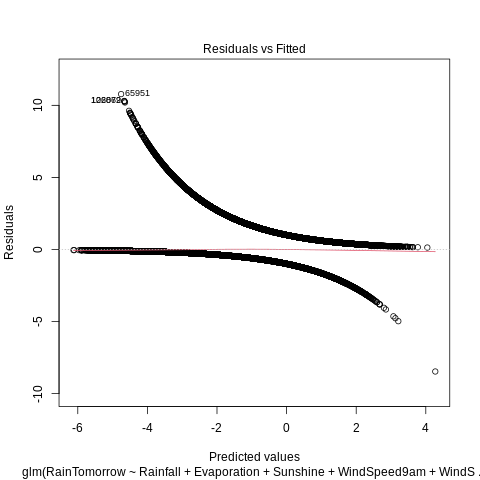

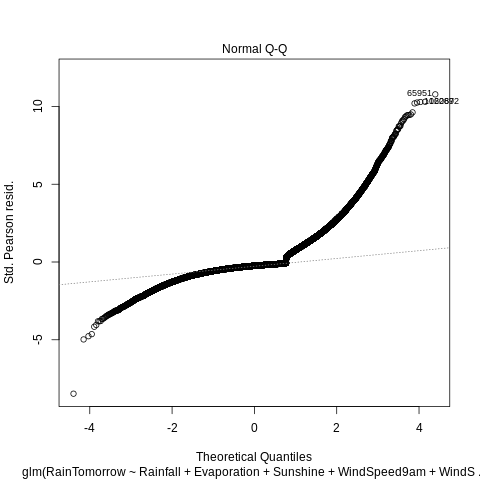

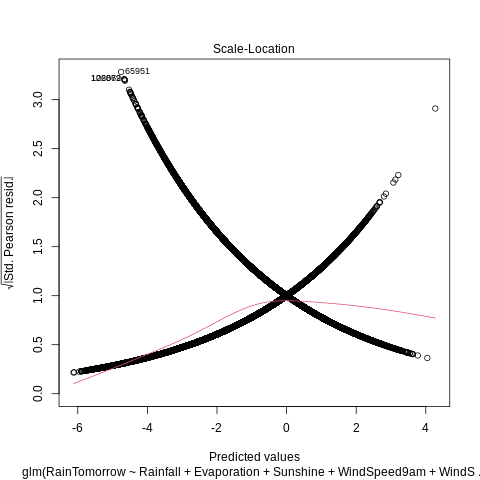

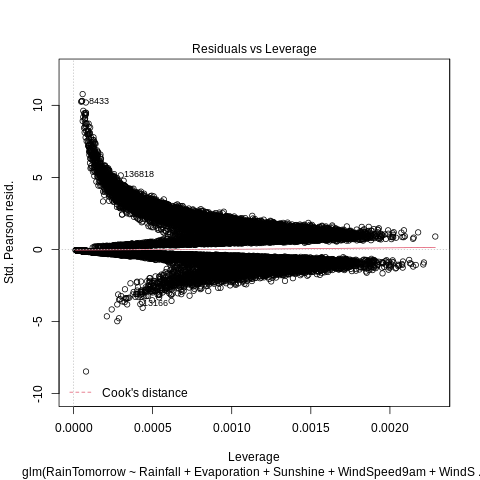

In [ ]:
%%R
plot(lg2)

In [ ]:
%%R
hist(d_normal$Rainfall)

UsageError: Cell magic `%%R` not found.
